# FINAL EDA - 12_ant

## 0. Previos

Se cargan las bases y las librerías a utilizar.

In [2]:
# Librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import numpy as np

#import generic_funcions as gf
#import adherence_functions as af
import warnings
warnings.filterwarnings('ignore')

ruta_archivos = 'C:/Users/monic/documentos/ds4a/ds4a_team80/1_data_transformation/'

## 1. Módulo de Interés

In [1]:
modulo = 'ant' # Este equivale al 'prefi' del diccionario. El diccionario está en: 1_data_transformation/generic_functions.py
ad_marca = 'adeherencia_0'
ids = ['id','year','month',ad_marca]

#### t-test
* `ant_j_sum_12`: suma del número de antecedentes de caracter respiratorio en los últimos doce meses.

#### Árbol de Decisión
* Ninguna

## 2. Carga de Datos

In [3]:
base = pd.read_csv( ruta_archivos + 'base_adeherencia_features_0.csv', sep='|' )
base.head()

,id,year,month,adeherencia_0,key,far_rea_asma_sum_6,far_rea_total_sum_6,far_evo_aun_sum_6,far_cau_def_sum_6,far_cau_otra_sum_6,...,hab_alcohol_avg_12,hab_cigarrillo_avg_12,hab_ejercicio_avg_12,inc_con_sum_6,inc_inc_sum_6,inc_con_sum_12,inc_inc_sum_12,imc_avg_6,imc_avg_12,imc_foto
0,500547,2016,7,1,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,3.0,0.0,3.0,NaN,NaN,NaN
1,500547,2019,3,1,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,500547,2019,10,1,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.8,NaN
3,500547,2019,12,1,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.8,NaN
4,500547,2020,1,1,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.8,NaN


In [9]:
variables = [i for i in base.columns if i.startswith( modulo + '_')]
df = base[ids + variables]
df.head()

,id,year,month,adeherencia_0,ant_j_sum_6,ant_otra_sum_6,ant_j_sum_12,ant_otra_sum_12
0,500547,2016,7,1,NaN,NaN,NaN,NaN
1,500547,2019,3,1,NaN,NaN,NaN,NaN
2,500547,2019,10,1,NaN,NaN,0.0,1.0
3,500547,2019,12,1,NaN,NaN,0.0,1.0
4,500547,2020,1,1,NaN,NaN,0.0,1.0


In [10]:
df.shape

(3663, 8)

## 3. Análisis
### 3.1. Completitud

In [32]:
# Se calcula el número de nulls por fila, y se descartan los registros con todo en null
df['nulls'] = df.isnull().sum(axis = 1)
todo_null = df.shape[1] - 5    #id, month, year, nuls, adeherencia_0
df = df[df['nulls'] < todo_null ].copy()
print("La base se reduce de "+ str(df.shape[0]) + " a " + str(base.shape[0]) +
      " registros. Que corresponde a un " + str(round(df.shape[0]/base.shape[0]*100, 2)) + "%.")
df.head()

La base se reduce de 1131 a 3663 registros. Que corresponde a un 30.88%.


,id,year,month,adeherencia_0,ant_j_sum_6,ant_otra_sum_6,ant_j_sum_12,ant_otra_sum_12,nulls,day,fecha
2,500547,2019,10,1,NaN,NaN,0.0,1.0,2,1,201910
3,500547,2019,12,1,NaN,NaN,0.0,1.0,2,1,201912
4,500547,2020,1,1,NaN,NaN,0.0,1.0,2,1,202001
5,500547,2020,3,1,NaN,NaN,0.0,1.0,2,1,202003
17,506808,2016,8,1,0.0,1.0,0.0,1.0,0,1,201608


### 3.2 Análisis Temporal

In [20]:
# se transforma la fecha para ser de tipo datetime
df['day'] = 1
df['fecha'] = pd.to_datetime(df[['year','month','day']])
df['fecha'] = df['fecha'].apply(lambda x: x.strftime('%Y%m'))

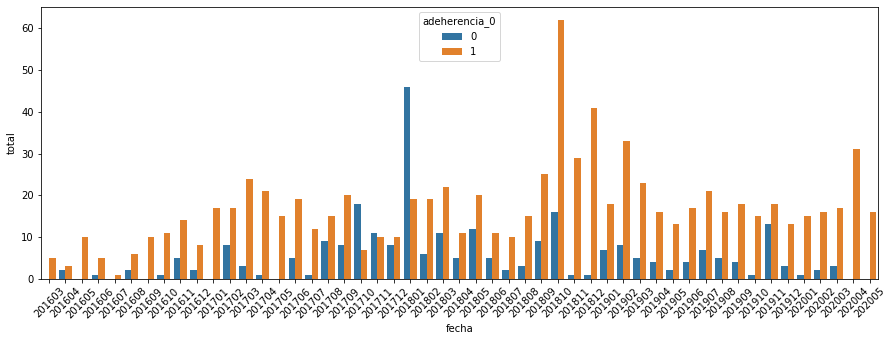

In [27]:
df_g = df.groupby(['fecha','adeherencia_0'])['id'].count().reset_index(name='total')

fig, ax = plt.subplots(figsize=(15, 5))
ax = sns.barplot(x="fecha", y="total", hue="adeherencia_0", data=df_g)
_ = ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

Se encuentran registros a lo largo de toda la historia. Desde 201603 hasta 202005. Hay un pico de no-adherencia en 201712. 

### 3.3 Correlaciones

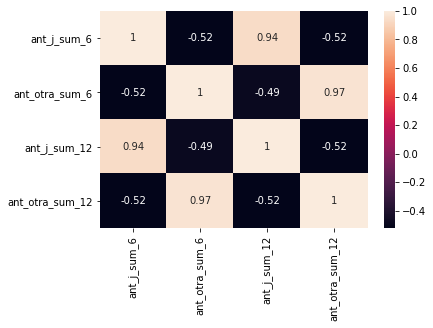

In [33]:
corrMatrix = df[variables].corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

Se encuentra que las variables en 6 y 12 meses están altamente correlacionadas.

### 3.4 Dispersión

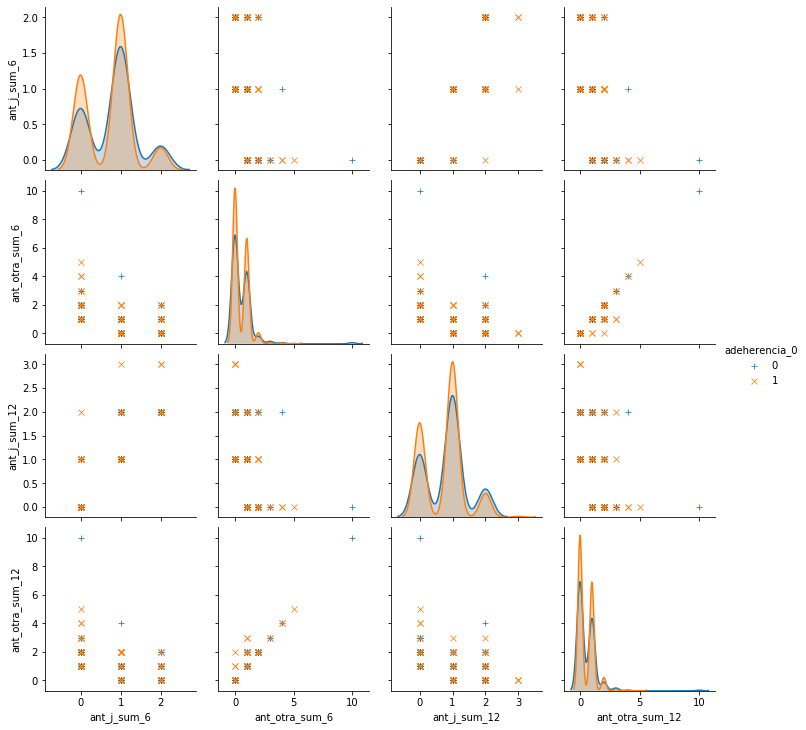

In [34]:
g = sns.pairplot(df[variables + ['adeherencia_0']], hue="adeherencia_0", markers=["+", "x"])

A simple vista no pareciera haber diferencia en la distribución de adherencia y no adherencia.

### 3.5 Boxplot Temporal

Dado que sólo una variable fue rescatada por el análisis y no se ve mayor diferencia con las demás variables. Se revisar el boxplot para la variable seleccionada.

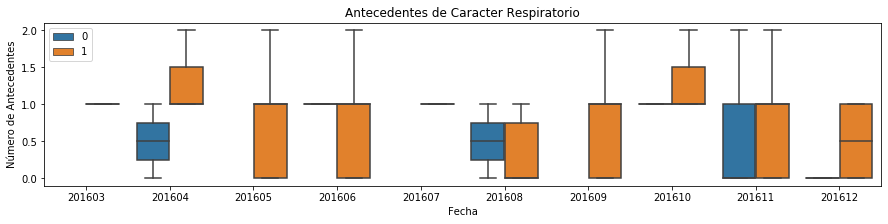

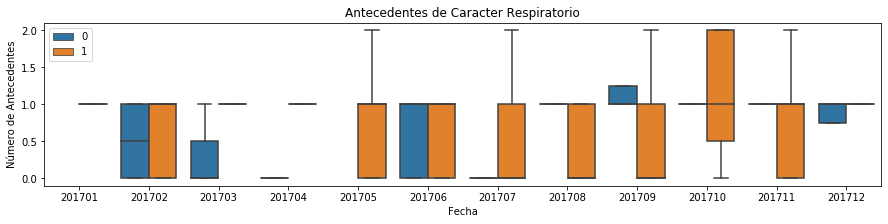

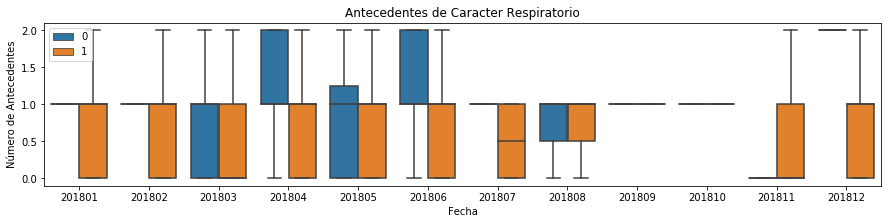

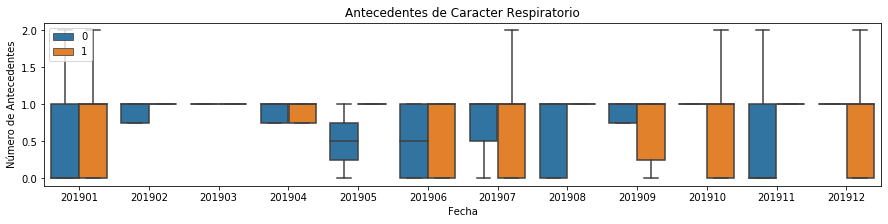

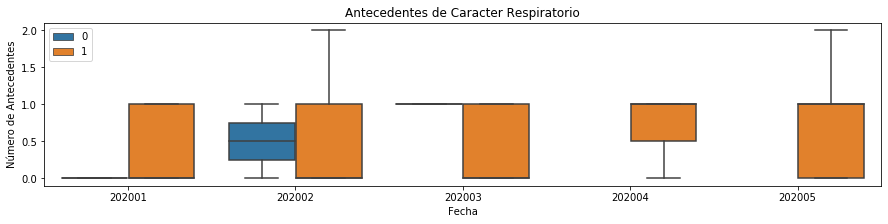

In [53]:
years = [2016,2017,2018,2019,2020]

for y in years :
    fig, ax = plt.subplots(figsize=(15, 3))
    m = sns.boxplot(
        x="fecha",
        y="ant_j_sum_12",
        hue="adeherencia_0",
        data=df[df['year']==y],
        orient="vertical",
        showfliers=False,
    )

    # Format plot
    plt.legend(loc="upper left")
    plt.title("Antecedentes de Caracter Respiratorio")
    #plt.xticks(rotation=45)
    plt.xlabel("Fecha")
    _ = plt.ylabel("Número de Antecedentes")

No se evidencia algún patrón diferenciado por adherencia de la variable en el tiempo. Normalmente la variable está entre los valores de 0 y 2 (aunque hay outliers en 3).

In [54]:
df.describe()

,id,year,month,adeherencia_0,ant_j_sum_6,ant_otra_sum_6,ant_j_sum_12,ant_otra_sum_12,nulls,day
count,1.131000e+03,1131.00000,1131.000000,1131.000000,676.000000,676.000000,1131.000000,1131.000000,1131.000000,1131.0
mean,1.237678e+06,2018.04863,6.315650,0.760389,0.754438,0.517751,0.771883,0.525199,0.804598,1.0
std,4.317117e+05,1.06776,3.654106,0.427035,0.605208,0.762828,0.623398,0.721375,0.981157,0.0
min,5.005470e+05,2016.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,8.725275e+05,2017.00000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,1.237493e+06,2018.00000,6.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.0
75%,1.617372e+06,2019.00000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.0
max,1.999629e+06,2020.00000,12.000000,1.000000,2.000000,10.000000,3.000000,10.000000,2.000000,1.0


### 3.6 Análisis por Paciente

In [70]:
df_gi = df.groupby('id')['year'].count().reset_index(name = 'cuenta')

print("Estas variables están presentes para " + str(df_gi.shape[0]) + " pacientes únicos. Los pacientes más frecuentes en el tiempo son:")

df_gi.sort_values('cuenta', ascending = False).head(10)

Estas variables están presentes para 490 pacientes únicos. Los pacientes más frecuentes en el tiempo son:


,id,cuenta
347,1590255,17
151,974281,15
78,742708,14
335,1536265,13
307,1463545,13
292,1427481,13
36,622031,12
191,1090949,11
62,692765,10
390,1718360,10


El siguiente conteo revisa de forma independiente los conteos por marca de adherencia.

In [74]:
df_gi = df.groupby(['id','adeherencia_0'])['year'].count().reset_index(name = 'cuenta')

df_gip = df_gi.pivot("id", "adeherencia_0", "cuenta").reset_index()
df_gip.fillna(0, inplace = True )
df_gip['total'] = df_gip[0] + df_gip[1]
df_gip.sort_values('total', ascending = False).head(15)

adeherencia_0,id,0,1,total
347,1590255,3.0,14.0,17.0
151,974281,2.0,13.0,15.0
78,742708,2.0,12.0,14.0
335,1536265,2.0,11.0,13.0
307,1463545,3.0,10.0,13.0
292,1427481,1.0,12.0,13.0
36,622031,4.0,8.0,12.0
191,1090949,4.0,7.0,11.0
62,692765,2.0,8.0,10.0
390,1718360,0.0,10.0,10.0
